# House Price Prediction

We are going to use the house price prediction dataset to build a prediction model and explore the ways to predict the house price.

Data source: https://www.kaggle.com/shree1992/housedata

<b>Claire Park (sp5741), Kidae Hong (kh3220)<b>

## Import and learn about Data

In [191]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.formula.api as smf

url = 'https://raw.githubusercontent.com/say0602/data_bootcamp_final_project/main/data.csv'
df = pd.read_csv(url,header=0, index_col=0)
df.head(5)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
date,,,,,,,,,,,,,,,,,
2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [192]:
df.isnull().values.any()

False

In [193]:
df.dtypes

price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
street            object
city              object
statezip          object
country           object
dtype: object

<ipython-input-194-e7551949585a>:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df.hist(ax=ax, grid=False)


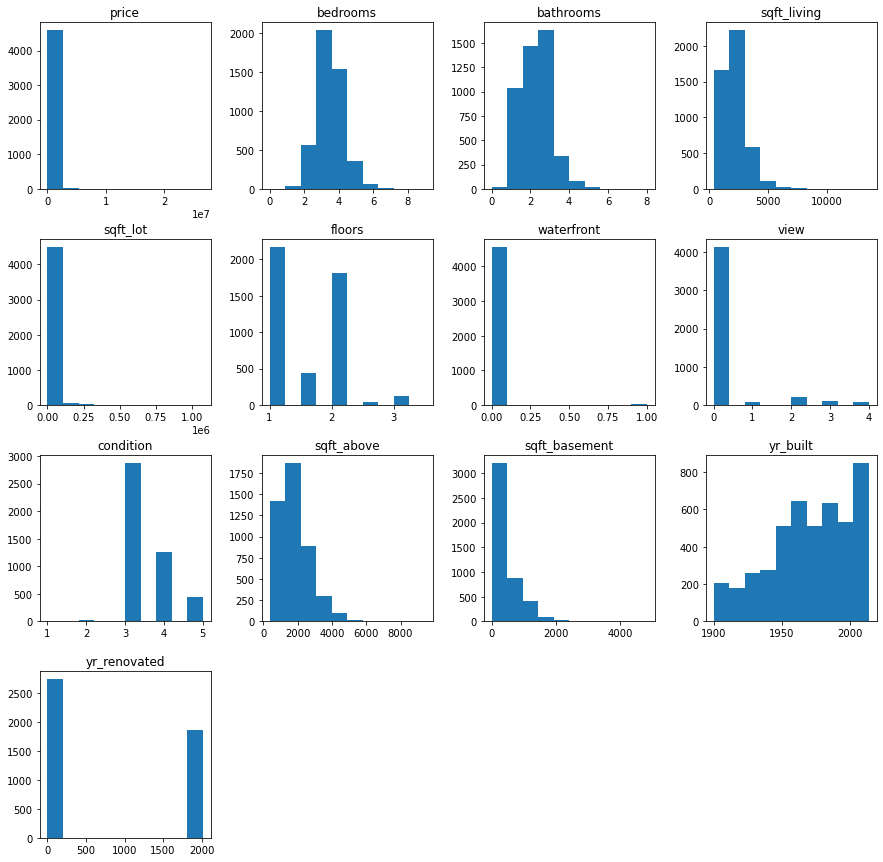

In [194]:
fig, ax = plt.subplots(figsize=(15, 15))
df.hist(ax=ax, grid=False)
plt.show()

In [195]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


Although there is no Null value here, the mimimum value of the price is 0, which doesn't help us for price prediction. So we are going to drop rows with 0 price house. 

In [196]:
df = df[df['price']>0].reset_index(drop=True)

In [197]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.551000e+03,4551.000000,4551.000000,4551.000000,4.551000e+03,4551.000000,4551.000000,4551.000000,4551.000000,4551.000000,4551.000000,4551.000000,4551.000000
mean,5.579059e+05,3.394639,2.155021,2132.372226,1.483528e+04,1.512195,0.006592,0.234674,3.449352,1822.221710,310.150516,1970.795649,808.564052
std,5.639299e+05,0.904595,0.776351,955.949708,3.596408e+04,0.538531,0.080932,0.765373,0.675160,854.452888,461.987629,29.760073,979.421487
min,7.800000e+03,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.262643e+05,3.000000,1.750000,1460.000000,5.000000e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.650000e+05,3.000000,2.250000,1970.000000,7.680000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.575000e+05,4.000000,2.500000,2610.000000,1.097800e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,600.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


Let's look into correlation between variables.

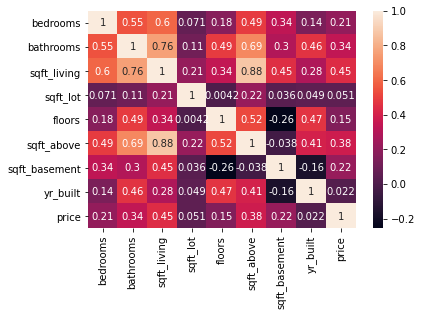

In [198]:
import seaborn as sns

new_df = df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 'sqft_basement', 'yr_built', 'price']]

#X = df['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'View', 'Condition', 'sqft_above', 'sqft_basement', 'yr_built']
#Y = df['price']

correlation_mat = new_df.corr()
sns.heatmap(correlation_mat, annot = True)
plt.show()

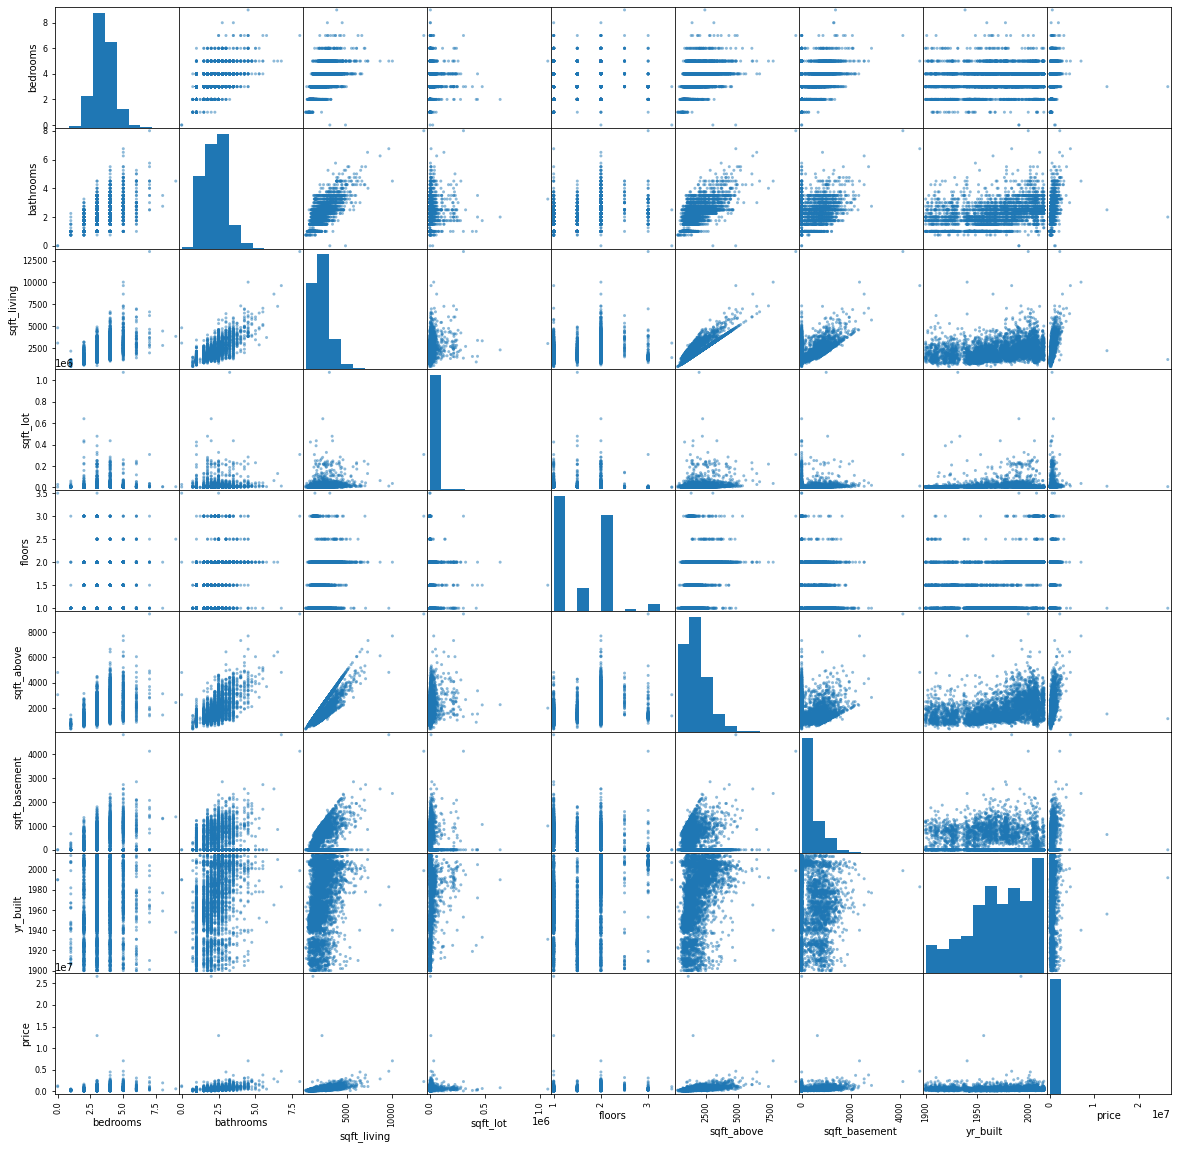

In [199]:
from pandas.plotting._misc import scatter_matrix
scatter_plots = scatter_matrix(new_df,figsize=(20,20))

We decided to choose one variable, sqft_living to predict the price of the house.
<br>
Next, we looked into how this variable looks.

<AxesSubplot:ylabel='Frequency'>

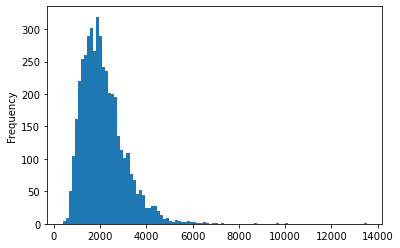

In [200]:
df['sqft_living'].plot.hist(bins=100)

<AxesSubplot:ylabel='Frequency'>

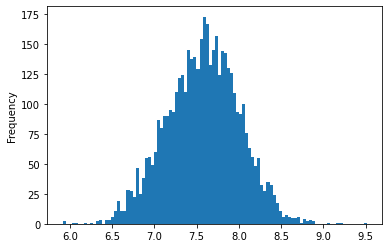

In [201]:
np.log(df['sqft_living']).plot.hist(bins=100)

In [202]:
#Because original data is highly skewed, we decided to use a logged sqft_living
df['lnsqft'] = np.log(df['sqft_living'])

## Create prediction models

Here, we are going to create two different models (KNN classifier and random forest) and compare their performances.

### 1) KNN classifier

In [203]:
from sklearn.neighbors import KNeighborsRegressor as knn

0.2134084571361341


<AxesSubplot:xlabel='lnsqft', ylabel='price'>

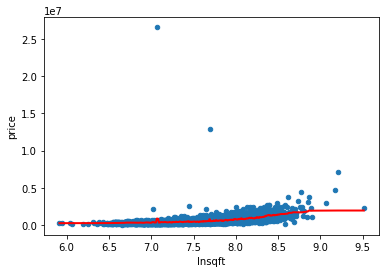

In [204]:
sklearn_knn = knn(n_neighbors=50).fit(X=df[['lnsqft']],y=df['price'])
print(sklearn_knn.score(X=df[['lnsqft']],y=df['price']))
df.plot.scatter(x='lnsqft',y='price')
df['yhat_knn'] = sklearn_knn.predict(df[['lnsqft']])
df.sort_values('lnsqft').set_index('lnsqft')['yhat_knn'].plot(color='r',lw=2)

In [205]:
from sklearn.model_selection import train_test_split
len(train_test_split(df[['lnsqft']],df['price']))

4

In [206]:
X_train, X_test, y_train, y_test = train_test_split(df[['lnsqft']],df['price'],test_size=.25)

In [207]:
print(len(X_train),len(X_test),len(X_train)/len(df))

3413 1138 0.7499450670182377


In [208]:
sklearn_knn = knn(n_neighbors=50).fit(X_train,y_train)
sklearn_knn.score(X_test,y_test)

0.1868237932243707

In [209]:
scores = pd.Series()
for i in range(10,60,5):
    scores.loc[i] = knn(n_neighbors=i).fit(X_train,y_train).score(X_test,y_test)
scores

#the optimal number is 50

<ipython-input-209-32ede8232b33>:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  scores = pd.Series()


10    0.009455
15    0.123168
20    0.113711
25    0.142566
30    0.166265
35    0.176022
40    0.182192
45    0.187712
50    0.186824
55    0.189700
dtype: float64

<AxesSubplot:>

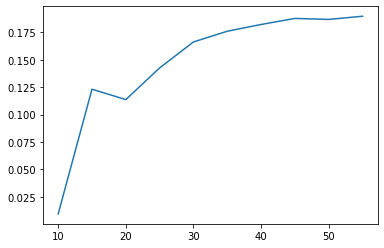

In [210]:
scores.plot()

In [211]:
from sklearn.model_selection import cross_val_score
cross_val_score(knn(n_neighbors=50),X=df[['lnsqft']],y=df['price'],cv=5).mean()

0.377488473704888

<ipython-input-212-9630c93d1d5a>:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  scores = pd.Series()


<AxesSubplot:>

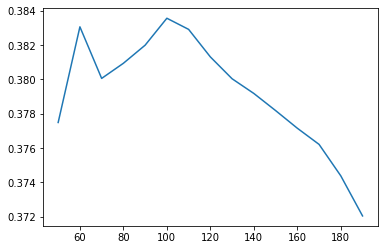

In [212]:
scores = pd.Series()
for i in range(50,200,10):
    scores.loc[i] = cross_val_score(knn(n_neighbors=i),df[['lnsqft']],df['price'],cv=5).mean()

scores.plot()

In [213]:
scores.max()

0.3835572715507913

In [214]:
scores.idxmax()

100

<AxesSubplot:xlabel='lnsqft', ylabel='price'>

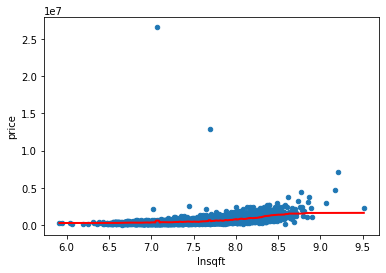

In [215]:
df['yhat_knn'] = knn(n_neighbors=100).fit(df[['lnsqft']],df['price']).predict(df[['lnsqft']])
df.plot.scatter(x='lnsqft',y='price')
df.sort_values('lnsqft').set_index('lnsqft')['yhat_knn'].plot(color='r',lw=2)

### 2) Random Forest 

In [216]:
from sklearn.ensemble import RandomForestRegressor as rf


In [217]:
%%time
scores_rf = pd.Series()
for i in range(1,7,1):
    scores_rf.loc[i] = cross_val_score(rf(n_estimators=100,max_depth=i),df[['lnsqft']],df['price'],cv=5).mean()

<timed exec>:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.


Wall time: 5.99 s


<AxesSubplot:>

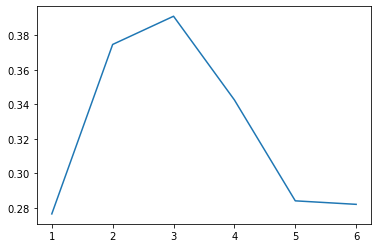

In [218]:
scores_rf.plot()

In [219]:
scores_rf.idxmax()

3

<AxesSubplot:xlabel='lnsqft', ylabel='price'>

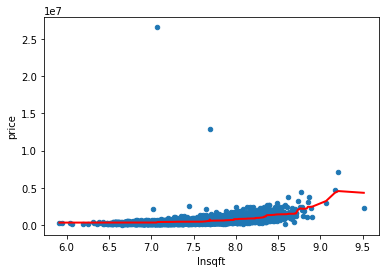

In [220]:
df['yhat_rf'] = rf(n_estimators=100,max_depth=3).fit(df[['lnsqft']],df['price']).predict(df[['lnsqft']])
df.plot.scatter(x='lnsqft',y='price')
df.sort_values('lnsqft').set_index('lnsqft')['yhat_rf'].plot(color='r',lw=2)

## Model Comparison 

<AxesSubplot:xlabel='lnsqft', ylabel='price'>

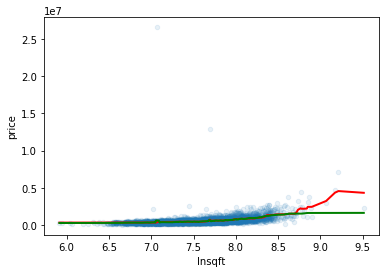

In [221]:
df.plot.scatter(x='lnsqft',y='price',alpha=.1)
df.sort_values('lnsqft').set_index('lnsqft')['yhat_rf'].plot(color='r',lw=2)
df.sort_values('lnsqft').set_index('lnsqft')['yhat_knn'].plot(color='g',lw=2)

In [222]:
rf(n_estimators=100,max_depth=3).fit(df[['lnsqft']],df['price']).score(df[['lnsqft']],df['price'])

0.22744328247326706

In [223]:
knn(n_neighbors=100).fit(df[['lnsqft']],df['price']).score(df[['lnsqft']],df['price'])

0.19947158875695736

In [224]:
df[['yhat_knn','yhat_rf','price']].corr()**2

,yhat_knn,yhat_rf,price
yhat_knn,1.000000,0.870516,0.201321
yhat_rf,0.870516,1.000000,0.226059
price,0.201321,0.226059,1.000000


Since the random forest model shows the higher r-squared score than the KNN model, our final model selection would be the random forest model. 